In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [77]:
customer_df = pd.read_csv('/content/drive/MyDrive/customers.csv')
customer_df_cleaned=customer_df.dropna(axis=0)

In [78]:
customer_df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [79]:
customer_df.shape

(10695, 11)

In [80]:
customer_df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [81]:
customer_df_cleaned = customer_df.dropna(axis=0)

In [82]:
customer_df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [83]:
customer_df_cleaned.shape

(8819, 11)

In [84]:
customer_df_cleaned.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [85]:
customer_df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [86]:
customer_df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
customer_df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [88]:
customer_df_cleaned['Profession'].unique()


array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [89]:
customer_df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [90]:
customer_df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [91]:
customer_df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [92]:
categories_list=[['Male', 'Female'],
           ['No', 'Yes'],
           ['No', 'Yes'],
           ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
            'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
           ['Low', 'Average', 'High']
           ]
enc = OrdinalEncoder(categories=categories_list)

In [93]:
customers_1 = customer_df_cleaned.copy()

In [94]:
customers_1[['Gender',
             'Ever_Married',
              'Graduated','Profession',
              'Spending_Score']] = enc.fit_transform(customers_1[['Gender',
                                                                 'Ever_Married',
                                                                 'Graduated','Profession',
                                                                 'Spending_Score']])

In [95]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [96]:
le = LabelEncoder()

In [97]:
customers_1['Segmentation'] = le.fit_transform(customers_1['Segmentation'])

In [98]:
customers_1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [99]:
customers_1 = customers_1.drop('ID',axis=1)
customers_1 = customers_1.drop('Var_1',axis=1)

In [100]:
customers_1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [101]:
customers_1['Segmentation'].unique()

array([3, 1, 2, 0])

In [102]:
X=customers_1[['Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size']].values

In [103]:
y1 = customers_1[['Segmentation']].values

In [104]:
one_hot_enc = OneHotEncoder()

In [105]:
one_hot_enc.fit(y1)

OneHotEncoder()

In [106]:
y1.shape

(8819, 1)

In [107]:
y = one_hot_enc.transform(y1).toarray()

In [108]:
y.shape

(8819, 4)

In [109]:
y1[0]

array([3])

In [110]:
y[0]

array([0., 0., 0., 1.])

In [111]:
X.shape


(8819, 8)

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)

In [113]:
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [114]:
X_train.shape

(5908, 8)

In [115]:
scaler_age = MinMaxScaler()

In [116]:
scaler_age.fit(X_train[:,2].reshape(-1,1))

MinMaxScaler()

In [117]:
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [118]:
# To scale the Age column
X_train_scaled[:,2] = scaler_age.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler_age.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [161]:
# Creating the model
ai_brain = Sequential([
  Dense(units = 4, input_shape=[8]),
  Dense(units =16, activation='relu'),
  Dense(units =4, activation ='softmax')
])

In [162]:
ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [163]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=500,batch_size=256,
             validation_data=(X_test_scaled,y_test),
             )

Epoch 1/500
24/24 [==============================] - 1s 11ms/step - loss: 1.5766 - accuracy: 0.3248 - val_loss: 1.5040 - val_accuracy: 0.3305
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.4315 - accuracy: 0.3407 - val_loss: 1.4054 - val_accuracy: 0.3318
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 1.3779 - accuracy: 0.3433 - val_loss: 1.3784 - val_accuracy: 0.3459
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3659 - accuracy: 0.3466 - val_loss: 1.3703 - val_accuracy: 0.3466
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3597 - accuracy: 0.3516 - val_loss: 1.3650 - val_accuracy: 0.3521
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3535 - accuracy: 0.3558 - val_loss: 1.3608 - val_accuracy: 0.3531
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 1.3479 - accuracy: 0.3583 - val_loss: 1.3566 - val_accuracy: 0.3494
Epoch 8/500


In [164]:
metrics = pd.DataFrame(ai_brain.history.history)

In [165]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.576585,0.324814,1.504023,0.330471
1,1.431546,0.340724,1.405389,0.331845
2,1.377872,0.343263,1.378404,0.345929
3,1.365931,0.346649,1.370310,0.346616
4,1.359651,0.351557,1.365009,0.352113


In [166]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

<Axes: >

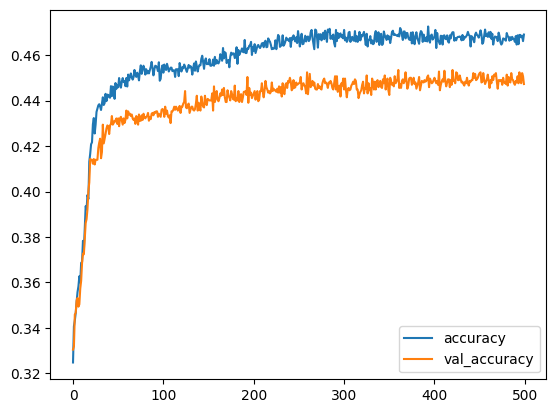

In [167]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

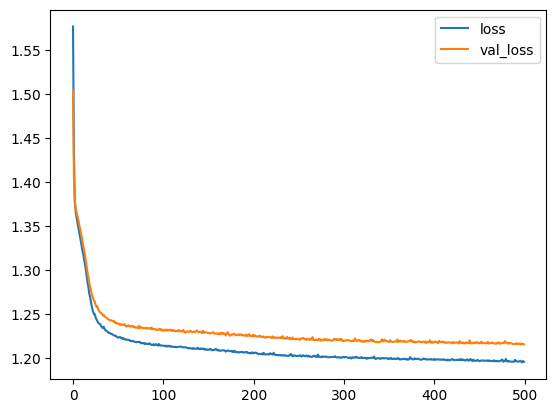

In [168]:
metrics[['loss','val_loss']].plot()

In [169]:
# Sequential predict_classes function is deprecated
# predictions = ai_brain.predict_classes(X_test)
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)

91/91 [==============================] - 0s 1ms/step


In [170]:
x_test_predictions.shape

(2911,)

In [171]:
y_test_truevalue = np.argmax(y_test,axis=1)

In [172]:
y_test_truevalue.shape

(2911,)

In [173]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[388  55 148 166]
 [279  76 241  90]
 [160  64 376  86]
 [214  40  66 462]]


In [174]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.37      0.51      0.43       757
           1       0.32      0.11      0.17       686
           2       0.45      0.55      0.50       686
           3       0.57      0.59      0.58       782

    accuracy                           0.45      2911
   macro avg       0.43      0.44      0.42      2911
weighted avg       0.43      0.45      0.42      2911



In [175]:
# Saving the Model
ai_brain.save('customer_classification_model.h5')

In [176]:
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le], fh)


In [177]:
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

In [178]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
     [X_train_scaled,y_train,X_test_scaled,y_test,customers_1,customer_df_cleaned,scaler_age,enc,one_hot_enc,le]=pickle.load(fh)

In [179]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)

1/1 [==============================] - 0s 64ms/step


In [180]:
print(x_single_prediction)

[2]


In [181]:
print(le.inverse_transform(x_single_prediction))

['C']
